In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

In [9]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


In [10]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [11]:
training = training.dropna()

In [12]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [13]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

In [14]:
y = training.drop(['Image'], axis=1)

In [15]:
y_ndarray = y.to_numpy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

In [17]:
model = Sequential()

In [18]:
def add_model(model, filters, maxpooling, *inputshape):   
    if inputshape:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())

In [19]:
add_model(model, 32, False, True)

In [20]:
add_model(model, 32, True)
add_model(model, 64, False)
add_model(model, 64, True)
add_model(model, 128, False)
add_model(model, 128, True)
add_model(model, 256, False)
add_model(model, 256, True)
add_model(model, 512, False)
add_model(model, 512, True)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

In [21]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae', 'acc'])

In [22]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'layer10_epoc100_kernel5p5_drop0p1.hdf5', monitor='val_mae', verbose=1, save_best_only=False)

In [23]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.02, callbacks=[checkpointer])

Train on 1468 samples, validate on 30 samples
Epoch 1/100
1468/1468 [==============================] - 628s 428ms/step - loss: 209.9967 - mae: 9.0436 - acc: 0.3924 - val_loss: 2145631.0000 - val_mae: 1264.2333 - val_acc: 0.2000

Epoch 00001: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 2/100
1468/1468 [==============================] - 452s 308ms/step - loss: 34.7538 - mae: 4.6041 - acc: 0.4707 - val_loss: 5520.4160 - val_mae: 57.9527 - val_acc: 0.2333

Epoch 00002: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 3/100
1468/1468 [==============================] - 391s 266ms/step - loss: 27.2524 - mae: 4.0963 - acc: 0.5068 - val_loss: 302.6995 - val_mae: 13.5397 - val_acc: 0.7667

Epoch 00003: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 4/100
1468/1468 [==============================] - 411s 280ms/step - loss: 24.2443 - mae: 3.8413 - acc: 0.5320 - val_loss: 71.4164 - val_mae: 7.2185 - val_acc: 0.7333

Epoch 00004: saving model to layer10_epo


Epoch 00034: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 35/100
1468/1468 [==============================] - 408s 278ms/step - loss: 6.7104 - mae: 1.9921 - acc: 0.7391 - val_loss: 3.9997 - val_mae: 1.3863 - val_acc: 0.5667

Epoch 00035: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 36/100
1468/1468 [==============================] - 455s 310ms/step - loss: 6.7024 - mae: 1.9957 - acc: 0.7214 - val_loss: 5.6249 - val_mae: 1.8303 - val_acc: 0.8333

Epoch 00036: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 37/100
1468/1468 [==============================] - 429s 292ms/step - loss: 7.0956 - mae: 2.0547 - acc: 0.7343 - val_loss: 5.2626 - val_mae: 1.8186 - val_acc: 0.8667

Epoch 00037: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 38/100
1468/1468 [==============================] - 420s 286ms/step - loss: 7.8295 - mae: 2.1403 - acc: 0.7446 - val_loss: 3.3261 - val_mae: 1.3107 - val_acc: 0.9333

Epoch 00038: saving model to layer1


Epoch 00068: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 69/100
1468/1468 [==============================] - 443s 302ms/step - loss: 4.7900 - mae: 1.6716 - acc: 0.7922 - val_loss: 2.7931 - val_mae: 1.2788 - val_acc: 0.9000

Epoch 00069: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 70/100
1468/1468 [==============================] - 435s 297ms/step - loss: 4.7268 - mae: 1.6637 - acc: 0.7888 - val_loss: 5.8002 - val_mae: 2.0452 - val_acc: 0.8667

Epoch 00070: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 71/100
1468/1468 [==============================] - 444s 302ms/step - loss: 5.0245 - mae: 1.7259 - acc: 0.8093 - val_loss: 3.0334 - val_mae: 1.3129 - val_acc: 0.9333

Epoch 00071: saving model to layer10_epoc100_kernel5p5_drop0p1.hdf5
Epoch 72/100
1468/1468 [==============================] - 444s 303ms/step - loss: 4.2574 - mae: 1.5797 - acc: 0.8093 - val_loss: 3.5986 - val_mae: 1.4325 - val_acc: 0.8333

Epoch 00072: saving model to layer1

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.465646870782442
Test accuracy: 1.115580677986145


In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2858125175642448
Test accuracy: 1.0961841344833374


In [25]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
train_predicts = model.predict(X_train)

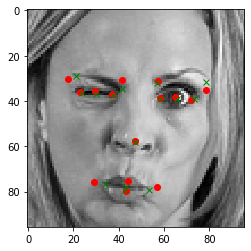

In [26]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

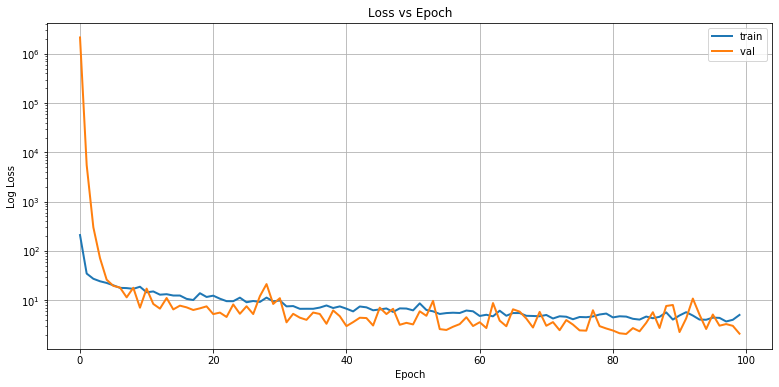

<Figure size 1440x1080 with 0 Axes>

In [28]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()
plt.yscale('log')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

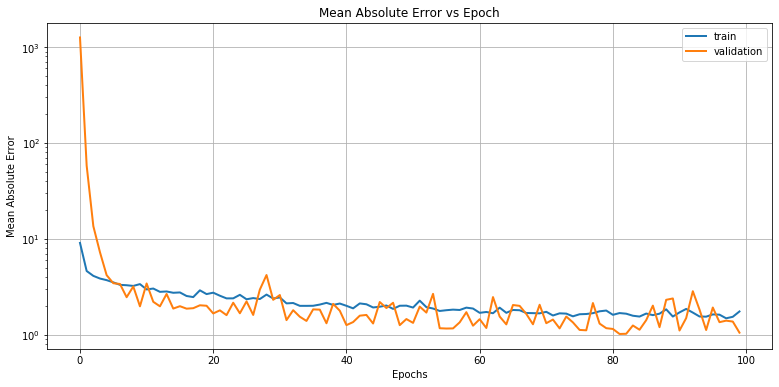

In [30]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.yscale('log')
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

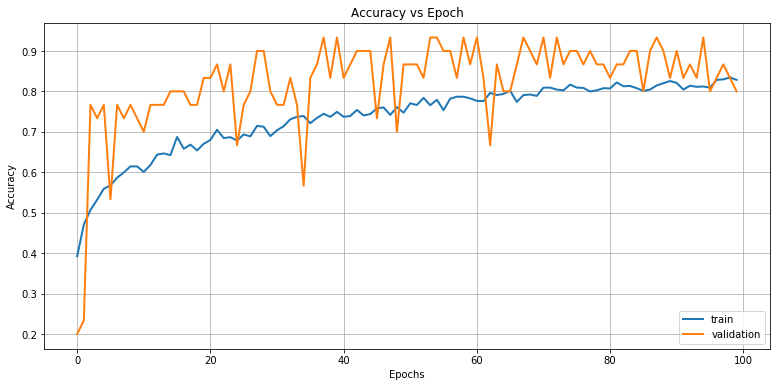

In [31]:
plt.figure(figsize=(13,6))
plt.plot(history.history['acc'], linewidth=2)
plt.plot(history.history['val_acc'], linewidth=2)
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
predict = model.predict(test_X)

In [ ]:
header = list(y.columns)

In [ ]:
df_predict = pd.DataFrame(predict, columns = header)

In [ ]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = df_predict.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

In [ ]:
SampleSubmission.Location = IdLookupTable.Location

In [ ]:
SampleSubmission.to_csv('submission_100_epochs_kernel5x5_2.csv', index=False)

In [ ]:
pd.DataFrame(history.history.items()).to_csv('history_submission_100_epochs_kernel5x5.csv', index=False)